# Importing pandas and playground dataset

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
play = pd.read_csv("https://data.wprdc.org/datastore/dump/e39ef76e-0a11-47c8-a86f-a37f55db7a2b")
play.head(10)

,id,name,equipment_type,manufacturer,safety_surface_type,ada_accessible,street_number,street,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1780722587,Able Long Playground,Play Area 2 to 5,Little Tykes,Pour in Place,f,211.0,Coast Ave,Beechview,4,19,42003192000,5,19,6,4-28,40.408381,-80.028520
1,702514290,North Ave. Playground,Play Area 2 to 5,Playworld,SofSurfaces,f,377.0,W North Ave,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.454526,-80.010188
2,1267038491,Vietnam Veteran's Playground,Slide,Little Tykes,SofSurfaces,f,108.0,Panther Hollow Rd,Squirrel Hill South,5,14,42003980500,3,14,4,2-8,40.434185,-79.944323
3,14898932,Schenley Overlook Playground,Swing 2 Bays,Little Tykes,SofSurfaces,t,NaN,Overlook Dr,Squirrel Hill South,5,14,42003980500,3,14,4,2-8,40.432130,-79.947774
4,204832406,Schenley Overlook Playground,Slide,Little Tykes,SofSurfaces,f,NaN,Overlook Dr,Squirrel Hill South,5,14,42003980500,3,14,4,2-8,40.432215,-79.947817
5,788191865,Chartiers Playground,Swing 2 Bays,Little Tykes,SofSurfaces,f,1550.0,Summerdale St,Windgap,2,28,42003563000,5,28,6,1-16,40.456812,-80.075131
6,1387089430,Chartiers Playground,Swing 2 Bays,Little Tykes,SofSurfaces,t,3783.0,Chartiers Ave,Windgap,2,28,42003563000,5,28,6,1-16,40.457218,-80.075070
7,1838217886,Chartiers Playground,Play Area 2 to 5,Little Tykes,SofSurfaces,f,3789.0,Chartiers Ave,Windgap,2,28,42003563000,5,28,6,1-16,40.457329,-80.075145
8,1315630398,Chartiers Playground,Play Area 5 to 12,Little Tykes,SofSurfaces,f,1544.0,Summerdale St,Windgap,2,28,42003563000,5,28,6,1-16,40.456681,-80.075019
9,1603952265,Chartiers Playground,Whirl,NaN,SofSurfaces,f,1548.0,Summerdale St,Windgap,2,28,42003563000,5,28,6,1-16,40.456970,-80.075110


In [2]:
play["neighborhood"].describe()

count                     440
unique                     67
top       Squirrel Hill South
freq                       32
Name: neighborhood, dtype: object

# Pivoting Data

In [3]:
##neighborhood=play.groupby("neighborhood").count()
neighborhood=play['neighborhood'].value_counts().sort_values(ascending=False)
neighborhood


Squirrel Hill South    32
East Liberty           26
Beechview              21
Allegheny Center       15
South Side Slopes      14
                       ..
Central Oakland         2
East Carnegie           2
Westwood                2
West Oakland            1
Strip District          1
Name: neighborhood, Length: 67, dtype: int64

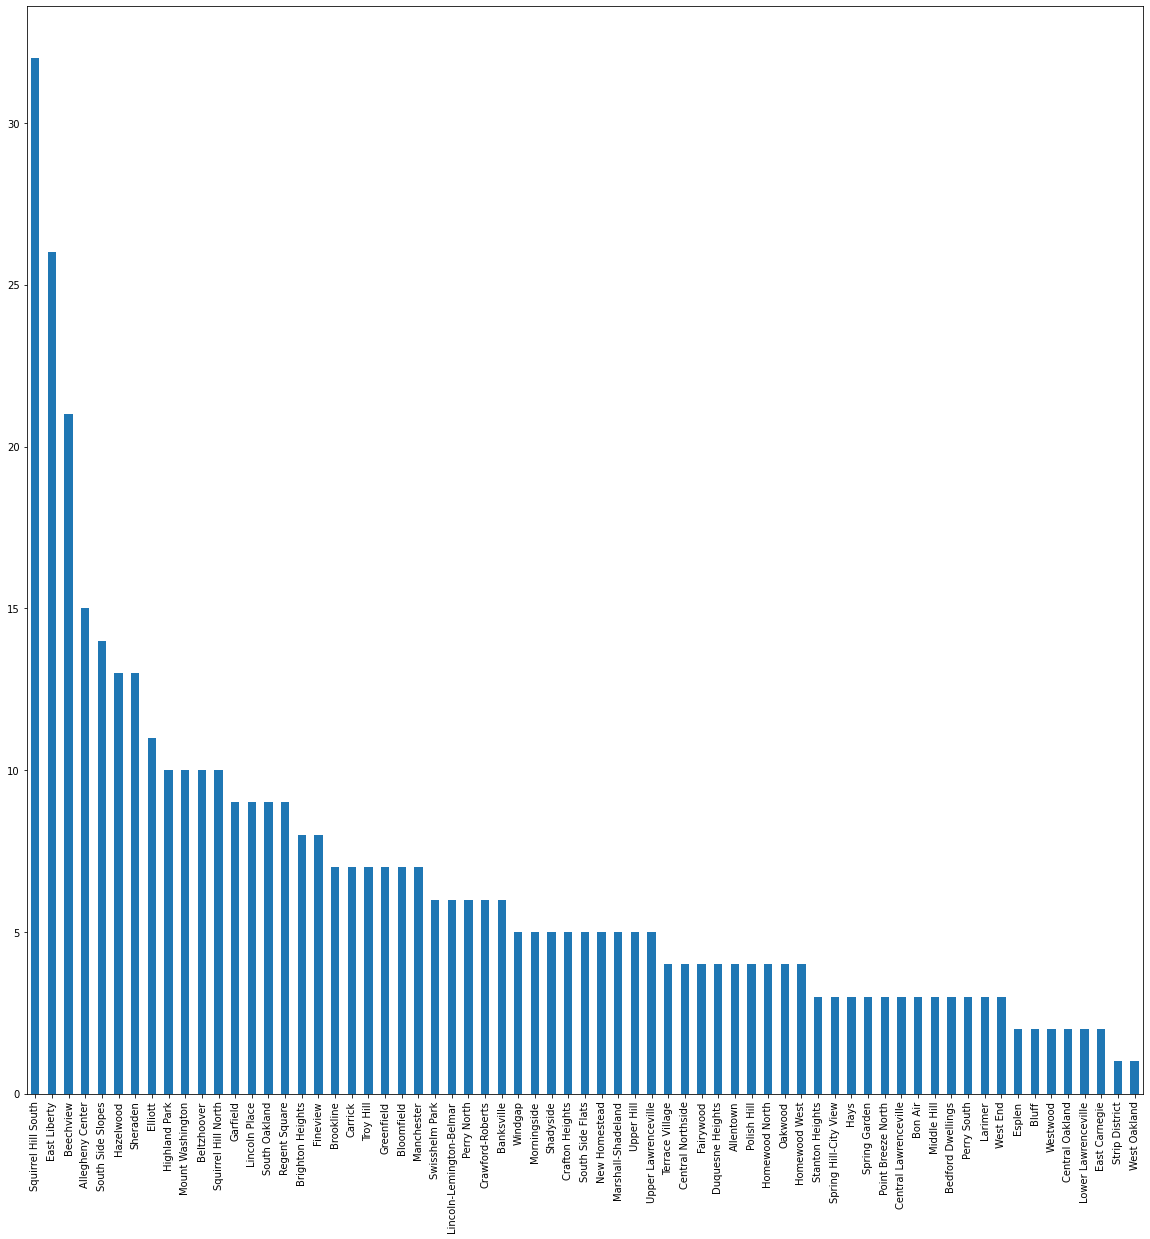

In [26]:
neighborhood.plot.bar(figsize=(20,20))


# Testing for ADA approved

In [27]:
mask=play['ada_accessible']=='t'
ada=play[mask]
graph=ada['neighborhood'].value_counts().sort_values(ascending=False)



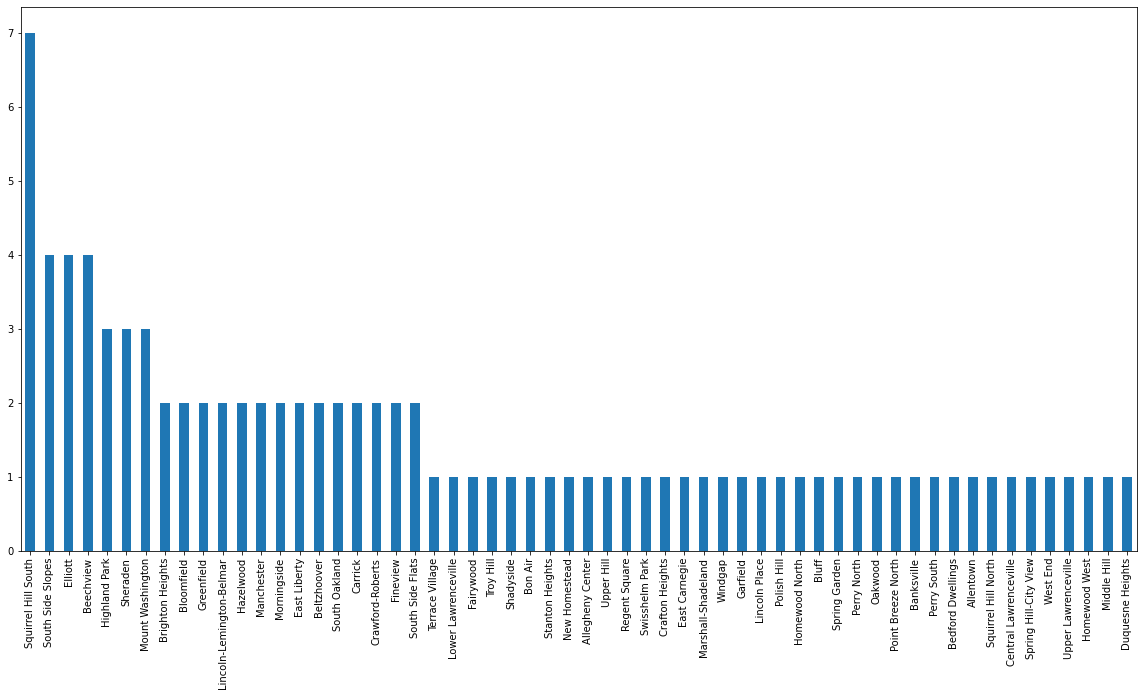

In [28]:
graph.plot.bar(figsize=(20,10))

# Formatting Bar graphs

TypeError: 'str' object is not callable

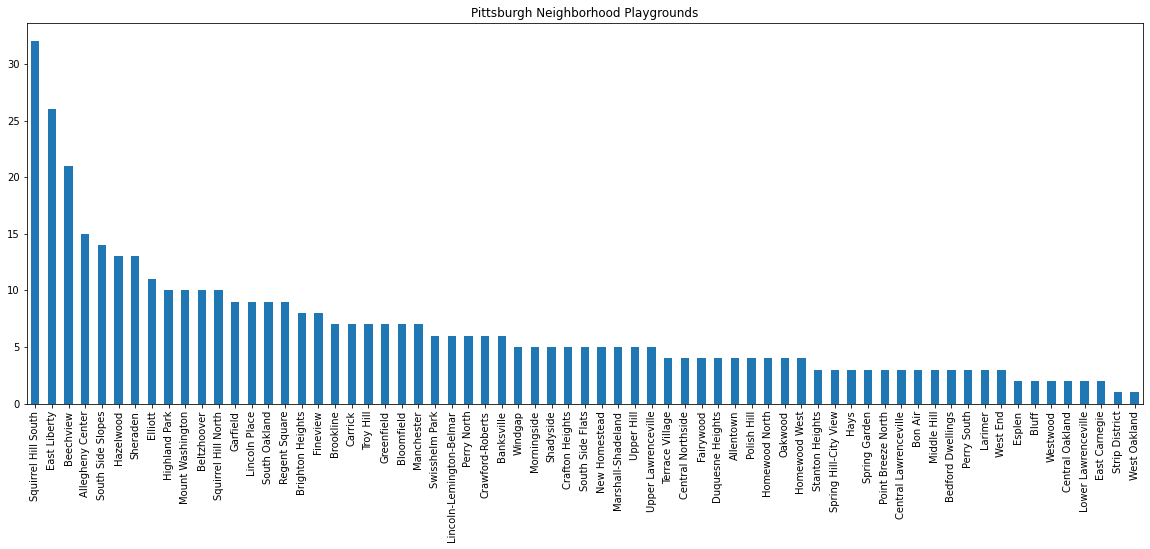

In [33]:
neighborhood.plot.bar(figsize=(20,7))

plt.title("Pittsburgh Neighborhood Playgrounds")
plt.xlabel('Neighborhood')


TypeError: 'str' object is not callable

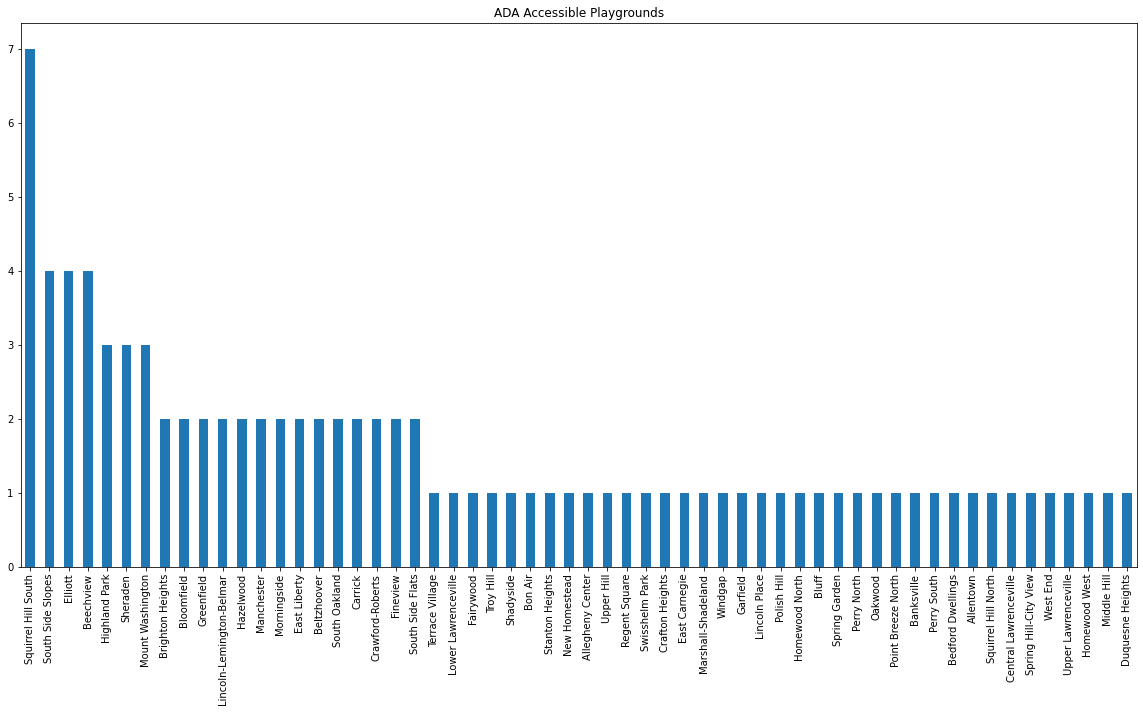

In [19]:
graph.plot.bar(figsize=(20,10))
plt.title("ADA Accessible Playgrounds")
plt.ylabel("Number of ADA Accessible Playgrounds")
plt.xlabel("Neighborhood")

# Creating other graphs (Mainly a Choropleth Map)

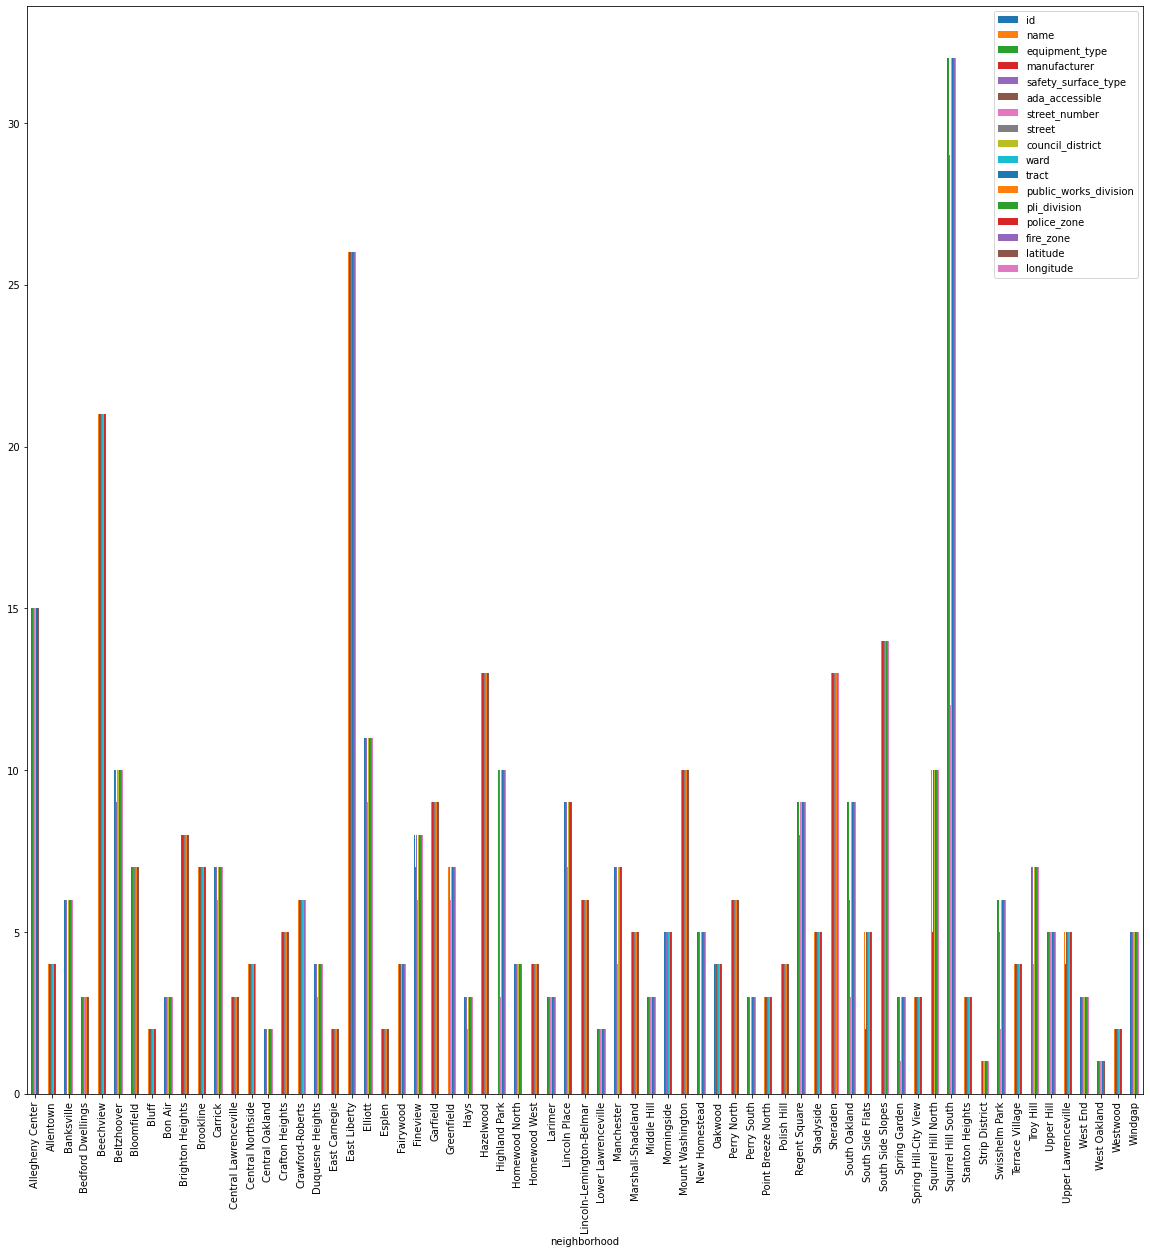

In [8]:
neighbor=play.groupby('neighborhood').count()
neighbor.plot.bar(figsize=(20,20))

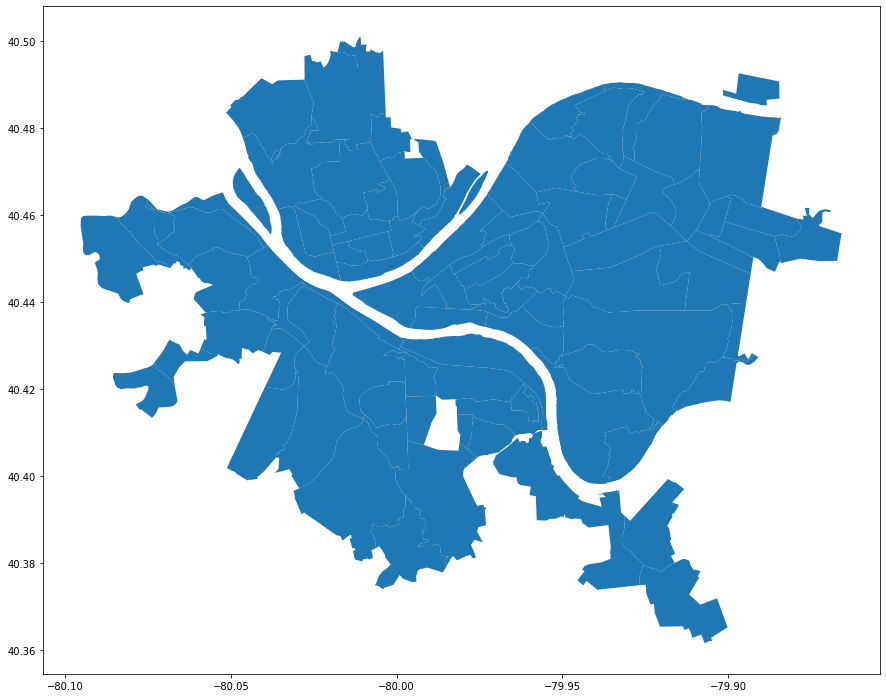

In [35]:
import geopandas as geo
hood=geo.read_file("Neighborhoods/Neighborhoods_.shp")
hood.plot(figsize=(15,15))


In [17]:
#steps = pd.read_csv("steps.csv")
# filter to important info
#num_steps = steps.groupby("neighborhood").sum()['number_of_steps']
#num_steps.sort_values(ascending=False)

play_map = hood.merge(neighbor, how='left', left_on='hood', right_on='neighborhood')
play_map[['hood','ada_accessible','geometry']]


,hood,ada_accessible,geometry
0,Central Oakland,2.0,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,NaN,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,1.0,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,6.0,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,1.0,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."
...,...,...,...
85,Ridgemont,NaN,"POLYGON ((-80.03431 40.43366, -80.03424 40.433..."
86,West End,3.0,"POLYGON ((-80.02869 40.44454, -80.02845 40.444..."
87,California-Kirkbride,NaN,"POLYGON ((-80.02039 40.46285, -80.02022 40.462..."
88,Glen Hazel,NaN,"POLYGON ((-79.92030 40.41205, -79.92027 40.412..."


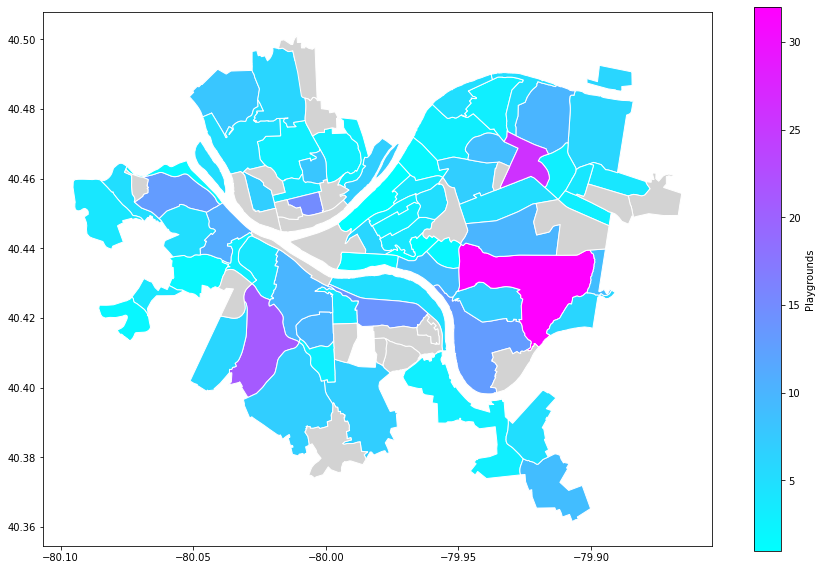

In [18]:
play_map.plot(column='ada_accessible',
             cmap='cool',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Playgrounds"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
             )

In [36]:
#ada_map=pd.merge(hood,graph,how='left',left_on='hood',right_on='neighborhood')
#ada_map[['hood','neighborhood','geometry']]

ValueError: You are trying to merge on object and int64 columns. If you wish to proceed you should use pd.concat

# Creating a Rating System

# Messing with Other Data and Merging

In [11]:
##ada_neighborhood=ada.groupby("neighborhood").count()
public_art_data = pd.read_csv("public-art.csv", index_col="id")

In [28]:
public_art_data = pd.read_csv("public-art.csv", index_col="id")
death = pd.read_csv("https://data.wprdc.org/dataset/ee735209-4de7-4ea4-b446-bf0f0f6d9cb3/resource/c2e1500a-a12a-4e91-be94-76c6a892b7e2/download/nhoodmedianage20112015.csv",parse_dates=True)
public_art_data['neighborhood']=public_art_data['neighborhood'].str.lower()
play['neighborhood']=play['neighborhood'].str.lower()


death['NEIGHBORHOOD']=death['NEIGHBORHOOD'].str.lower()
death.head()

,NEIGHBORHOOD,BLACKdeaths,Black MD AGE AT DEATH,WHITEdeaths,White MD AGE AT DEATH,TOTALdeaths*,TOTAL MD AGE AT DEATH
0,south shore,0.0,0.0,0.0,0.0,0.0,0.0
1,chateau,0.0,0.0,2.0,NaN,2.0,NaN
2,north shore,0.0,0.0,4.0,NaN,5.0,80.0
3,allegheny west,3.0,NaN,4.0,NaN,8.0,65.0
4,saint clair,5.0,67.5,5.0,67.5,10.0,67.5


In [ ]:
metric=play.merge(public_art_data, how='left', on='neighborhood')
death['neighborhood']=death['NEIGHBORHOOD']
final_metric=metric.merge(death, how='left', on='neighborhood')
final_metric.head()
new=final_metric['neighborhood'].value_counts().sort_values(ascending=False)
new.describe()

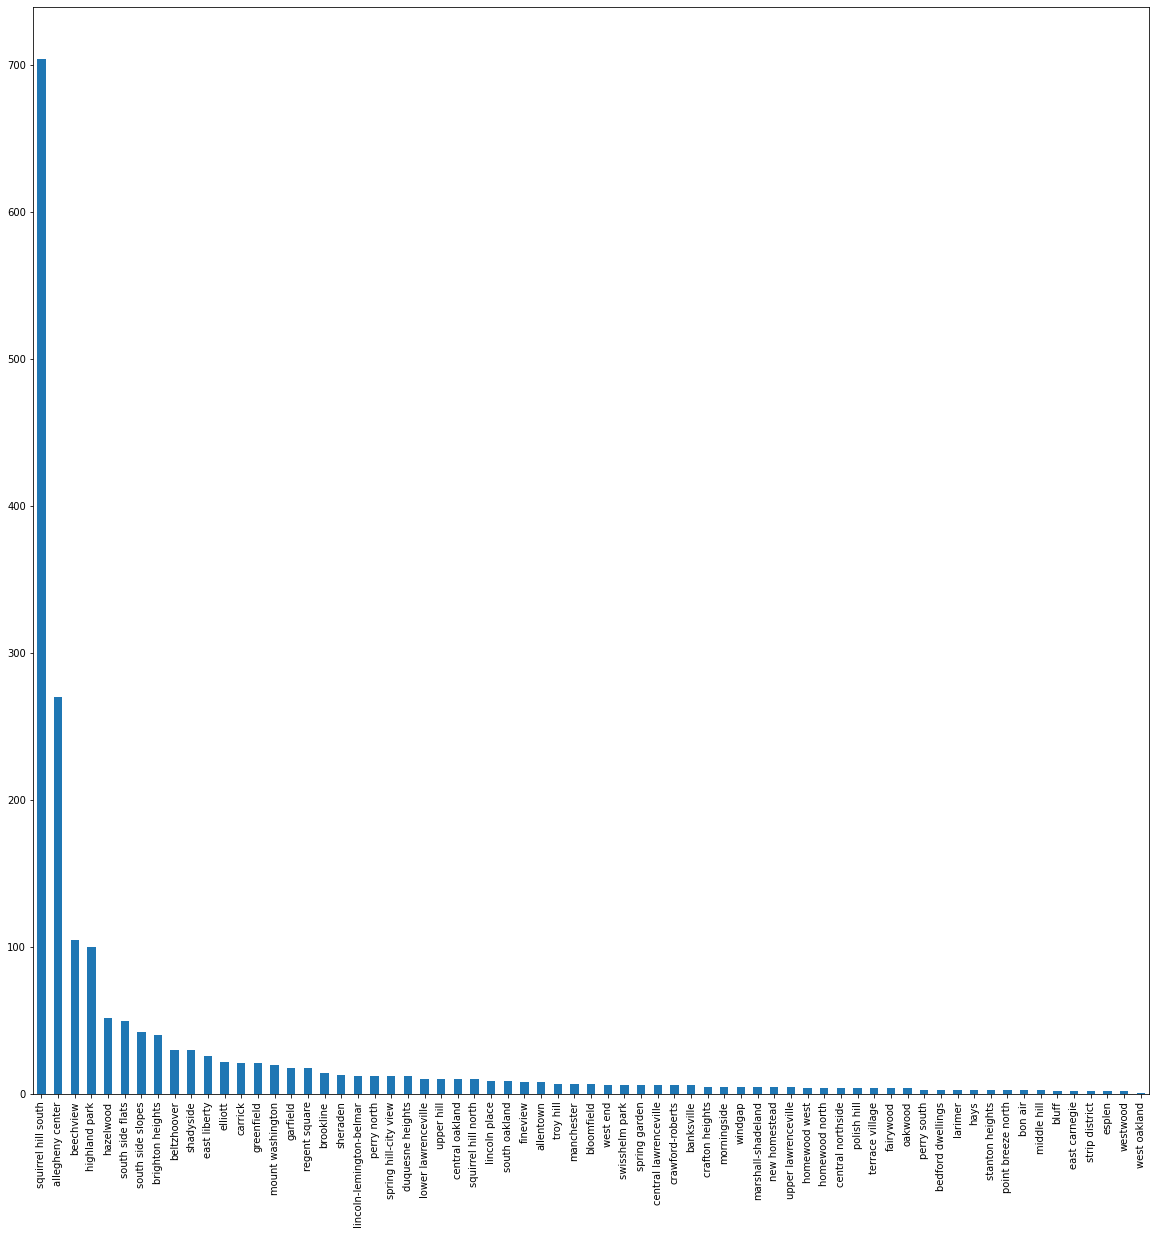

In [52]:
new.plot.bar(figsize=(20,20))

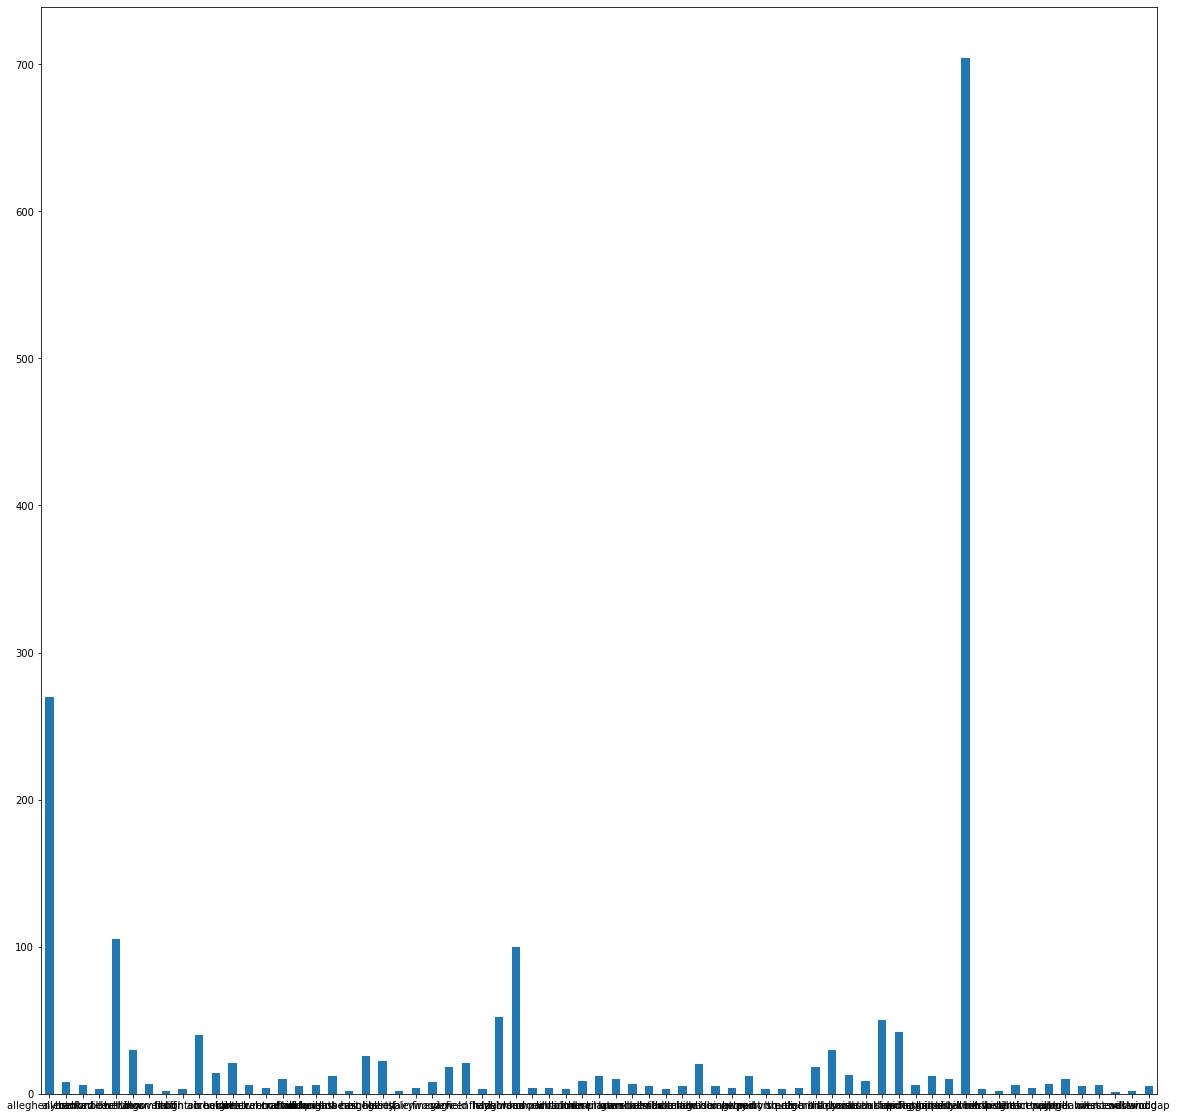

In [54]:
final_metric["neighborhood"].value_counts().sort_index().plot(kind='bar', rot=0, figsize=(20,20))

In [45]:
final_metric.sort_values(by='neighborhood', ascending=False)
new=final_metric.groupby('neighborhood')
new.head()

,id,name_x,equipment_type,manufacturer,safety_surface_type,ada_accessible,street_number,street,neighborhood,council_district_x,...,fire_zone_y,latitude_y,longitude_y,NEIGHBORHOOD,BLACKdeaths,Black MD AGE AT DEATH,WHITEdeaths,White MD AGE AT DEATH,TOTALdeaths*,TOTAL MD AGE AT DEATH
0,1780722587,Able Long Playground,Play Area 2 to 5,Little Tykes,Pour in Place,f,211.0,Coast Ave,beechview,4,...,4-28,40.410721,-80.024540,beechview,35.0,55.8,398.0,80.2,434.0,78.9
1,1780722587,Able Long Playground,Play Area 2 to 5,Little Tykes,Pour in Place,f,211.0,Coast Ave,beechview,4,...,4-28,40.403859,-80.030189,beechview,35.0,55.8,398.0,80.2,434.0,78.9
2,1780722587,Able Long Playground,Play Area 2 to 5,Little Tykes,Pour in Place,f,211.0,Coast Ave,beechview,4,...,4-28,40.403698,-80.030187,beechview,35.0,55.8,398.0,80.2,434.0,78.9
3,1780722587,Able Long Playground,Play Area 2 to 5,Little Tykes,Pour in Place,f,211.0,Coast Ave,beechview,4,...,4-28,40.403793,-80.030119,beechview,35.0,55.8,398.0,80.2,434.0,78.9
4,1780722587,Able Long Playground,Play Area 2 to 5,Little Tykes,Pour in Place,f,211.0,Coast Ave,beechview,4,...,4-28,40.403854,-80.030128,beechview,35.0,55.8,398.0,80.2,434.0,78.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1840,407934325,Wightman Playground,Slide,NaN,NaN,f,1328.0,S Negley Ave,squirrel hill north,8,...,NaN,NaN,NaN,squirrel hill north,6.0,75.0,231.0,85.3,242.0,85.0
1841,1894981385,Wightman Playground,Stepping Pod - 5,NaN,NaN,f,1322.0,S Negley Ave,squirrel hill north,8,...,NaN,NaN,NaN,squirrel hill north,6.0,75.0,231.0,85.3,242.0,85.0
1842,506464121,Wightman Playground,Spinner - Cozy Cocoon,NaN,NaN,f,1316.0,S Negley Ave,squirrel hill north,8,...,NaN,NaN,NaN,squirrel hill north,6.0,75.0,231.0,85.3,242.0,85.0
1843,550411981,Wightman Playground,Swing 4 Bays,NaN,NaN,t,1314.0,S Negley Ave,squirrel hill north,8,...,NaN,NaN,NaN,squirrel hill north,6.0,75.0,231.0,85.3,242.0,85.0


In [45]:
final_metric.sort_values(by='neighborhood', ascending=False)
new=final_metric.groupby('neighborhood')
new.head()

,id,name_x,equipment_type,manufacturer,safety_surface_type,ada_accessible,street_number,street,neighborhood,council_district_x,...,fire_zone_y,latitude_y,longitude_y,NEIGHBORHOOD,BLACKdeaths,Black MD AGE AT DEATH,WHITEdeaths,White MD AGE AT DEATH,TOTALdeaths*,TOTAL MD AGE AT DEATH
0,1780722587,Able Long Playground,Play Area 2 to 5,Little Tykes,Pour in Place,f,211.0,Coast Ave,beechview,4,...,4-28,40.410721,-80.024540,beechview,35.0,55.8,398.0,80.2,434.0,78.9
1,1780722587,Able Long Playground,Play Area 2 to 5,Little Tykes,Pour in Place,f,211.0,Coast Ave,beechview,4,...,4-28,40.403859,-80.030189,beechview,35.0,55.8,398.0,80.2,434.0,78.9
2,1780722587,Able Long Playground,Play Area 2 to 5,Little Tykes,Pour in Place,f,211.0,Coast Ave,beechview,4,...,4-28,40.403698,-80.030187,beechview,35.0,55.8,398.0,80.2,434.0,78.9
3,1780722587,Able Long Playground,Play Area 2 to 5,Little Tykes,Pour in Place,f,211.0,Coast Ave,beechview,4,...,4-28,40.403793,-80.030119,beechview,35.0,55.8,398.0,80.2,434.0,78.9
4,1780722587,Able Long Playground,Play Area 2 to 5,Little Tykes,Pour in Place,f,211.0,Coast Ave,beechview,4,...,4-28,40.403854,-80.030128,beechview,35.0,55.8,398.0,80.2,434.0,78.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1840,407934325,Wightman Playground,Slide,NaN,NaN,f,1328.0,S Negley Ave,squirrel hill north,8,...,NaN,NaN,NaN,squirrel hill north,6.0,75.0,231.0,85.3,242.0,85.0
1841,1894981385,Wightman Playground,Stepping Pod - 5,NaN,NaN,f,1322.0,S Negley Ave,squirrel hill north,8,...,NaN,NaN,NaN,squirrel hill north,6.0,75.0,231.0,85.3,242.0,85.0
1842,506464121,Wightman Playground,Spinner - Cozy Cocoon,NaN,NaN,f,1316.0,S Negley Ave,squirrel hill north,8,...,NaN,NaN,NaN,squirrel hill north,6.0,75.0,231.0,85.3,242.0,85.0
1843,550411981,Wightman Playground,Swing 4 Bays,NaN,NaN,t,1314.0,S Negley Ave,squirrel hill north,8,...,NaN,NaN,NaN,squirrel hill north,6.0,75.0,231.0,85.3,242.0,85.0


In [48]:
final_metric.plot.bar(figsize=(20,20), ['neighborhood'],  ['ada_accessible','TOTAL MD AGE AT DEATH', 'neighborhood'], stacked=True)

SyntaxError: positional argument follows keyword argument (<ipython-input-48-5bce51b1e885>, line 1)

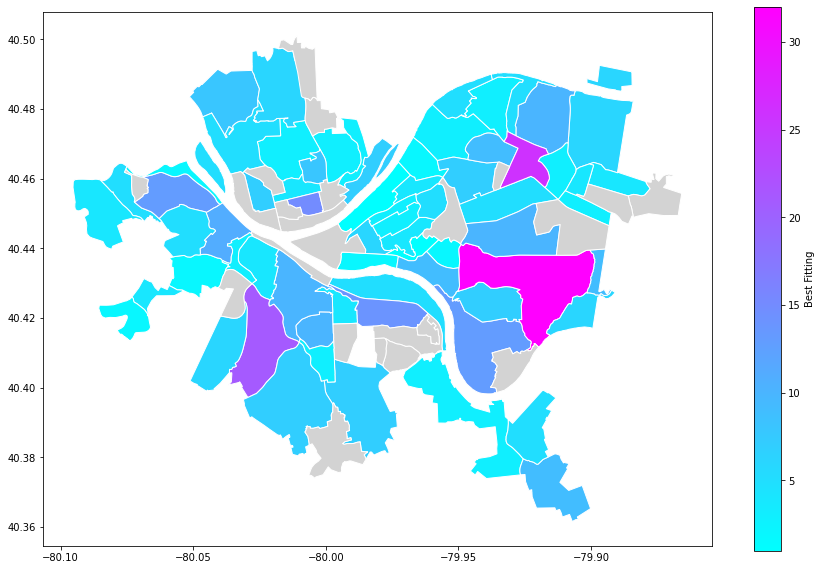

In [44]:
new_map = hood.merge(new, how='left', left_on='hood', right_on='neighborhood')
play_map.plot(column='id',
             cmap='cool',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Best Fitting"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
             )

neighborhood    32
dtype: int64


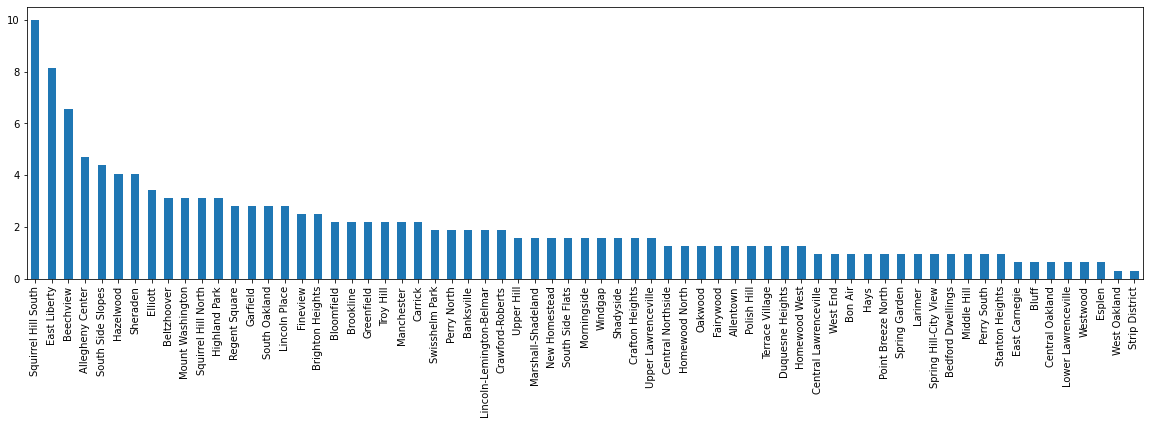

In [27]:

rate=pd.DataFrame(neighborhood)
highest=rate.max()
print(highest)
rate["Rating"]=((rate['neighborhood']/32)*10)
rate['Rating'].plot.bar(figsize=(20,5))
